# Andrew Dabydeen and Ryan Hedges

# Breast Cancer Analysis

#### Image Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import scipy.misc
%matplotlib inline
from tensorflow.keras import backend as K
from tensorflow.keras import applications
from tensorflow.keras import activations
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from PIL import ImageFilter

In [2]:
x_images = np.load('X.npy')  
y_images = np.load('Y.npy')   

perm_array = np.arange(len(x_images))
np.random.shuffle(perm_array)
x_images = x_images[perm_array]
y_images = y_images[perm_array]

print("Overall Cancer Rate: ", np.sum(y_images) / len(y_images))

Overall Cancer Rate:  0.5026140255994231


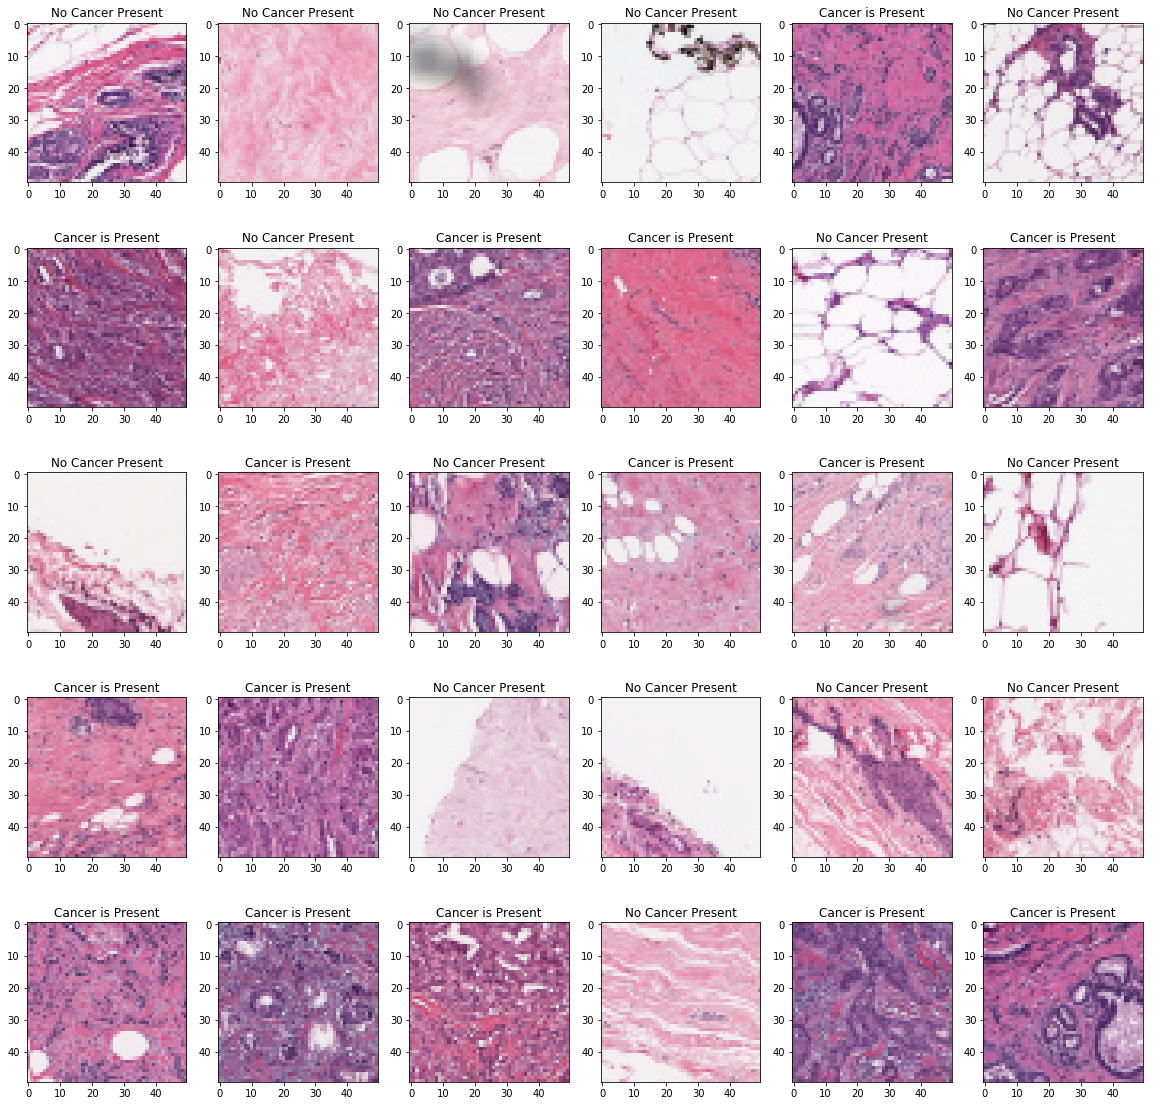

In [4]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('Cancer is Present' if y_images[i] == 1 else 'No Cancer Present')
    plt.imshow(x_images[i])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_images, y_images, test_size=0.33, random_state=42)

#### Model 1: Base

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# history = model.fit(X_train, y_train, epochs=40, batch_size=64,
#                    validation_data=(X_test, y_test))
# model._make_predict_function()

In [ ]:
# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(loss_values) + 1)

# plt.figure(figsize=(14, 4))

# plt.subplot(1,2,1)
# plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# acc = history_dict['acc']
# val_acc = history_dict['val_acc']

# epochs = range(1, len(loss_values) + 1)

# plt.subplot(1,2,2)
# plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

In [ ]:
# model.evaluate(X_test, y_test)

#### Model 2: Advanced Model

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=.2,
                             height_shift_range=.2,
                             shear_range=.2,
                             zoom_range=.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

train_generator = datagen.flow(X_train, y_train, batch_size=32)

history = model.fit_generator(train_generator,
                              steps_per_epoch=300,
                              epochs=40,
                              validation_data=(X_test, y_test))

Epoch 1/40
300/300 [==============================] - 7s 24ms/step - loss: 0.7199 - acc: 0.6455 - val_loss: 0.6069 - val_acc: 0.7127
Epoch 2/40
300/300 [==============================] - 6s 21ms/step - loss: 0.6154 - acc: 0.6778 - val_loss: 0.5420 - val_acc: 0.7395
Epoch 3/40
300/300 [==============================] - 6s 21ms/step - loss: 0.5852 - acc: 0.7185 - val_loss: 0.6355 - val_acc: 0.6046
Epoch 4/40
300/300 [==============================] - 6s 21ms/step - loss: 0.5810 - acc: 0.7105 - val_loss: 0.5918 - val_acc: 0.6947
Epoch 5/40
300/300 [==============================] - 6s 21ms/step - loss: 0.5683 - acc: 0.7257 - val_loss: 0.6535 - val_acc: 0.6379
Epoch 6/40
300/300 [==============================] - 6s 21ms/step - loss: 0.5727 - acc: 0.7180 - val_loss: 0.5556 - val_acc: 0.7307
Epoch 7/40
300/300 [==============================] - 6s 21ms/step - loss: 0.5491 - acc: 0.7320 - val_loss: 0.5780 - val_acc: 0.7247
Epoch 8/40
300/300 [==============================] - 6s 22ms/step - 

In [12]:
model._make_predict_function()

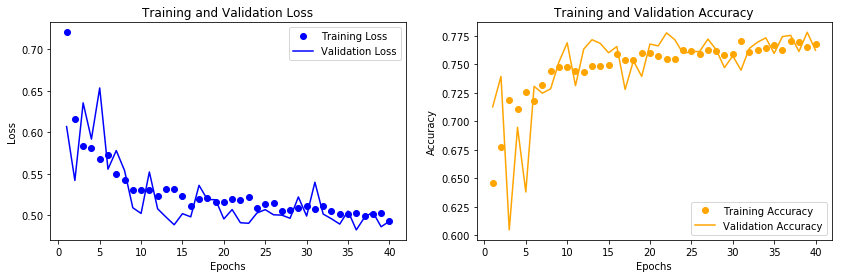

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [21]:
model.evaluate(X_test, y_test)

1831/1831 [==============================] - 0s 69us/sample - loss: 0.4929 - acc: 0.7624


[0.49285265682890794, 0.7624249]

#### Feature Visualization

In [13]:
def sigmoid(x, k = 1):
    return 1/(np.exp(-x*k) + 1)

In [14]:
tf.compat.v1.disable_eager_execution()

last_layer = model.layers[-1]
last_layer.activation = activations.linear
model = models.Model(inputs = model.input, outputs = last_layer(model.layers[-2].output))

In [30]:
img = x_images[25]
img_array = np.array(img)[np.newaxis,:,:,:]
model._make_predict_function()
img_class = np.argmax(model.predict(img_array))
grad = K.gradients(model.layers[-1].output[0,img_class], model.inputs[0])
grad_func = K.function(model.inputs, grad)

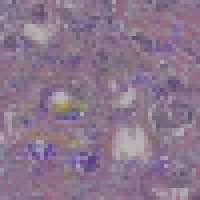

In [31]:
saliency_array = grad_func([img_array])[0][0,...]
saliency_array -= np.min(saliency_array)
saliency_array /= np.max(saliency_array)
im1 = Image.fromarray((255*saliency_array).astype('uint8'), "RGB")
im2 = Image.fromarray(img)
Image.blend(im1, im2, 0.5).resize([200,200])